In [1]:
import numpy as np
import nltk
import unicodedata
from collections import Counter
import matplotlib.pylab as plt
import pandas as pd

In [2]:
#Abrir y leer texto
file = open('Borges.txt', 'r')
texto = file.read()

In [3]:
#Cambio a minúscula
texto = texto.lower()

In [4]:
#Puntuación a quitar
import string
punctuation = string.punctuation+'¡'+'"'+'¿'+'—'+'“'+'-'+'”'+'º'

In [5]:
#Cambios que necesitan la puntuación como referencia
cambios_punct = {'y ':'i ','y,':'i,','y.':'i.'}
for key in cambios_punct.keys():
    texto = texto.replace(key, cambios_punct[key])

In [6]:
#Vector con palabras del texto
#tokens = nltk.word_tokenize(texto)

In [7]:
#libreria para ambio numerales a literales (opcional)
#from num2words import num2words as n2w
#n2w(word, to = 'year',lang = 'es')

In [8]:
#Quito o cambio de números 
new_texto = []
for word in tokens:
    if word.isdigit():   #quito números o los convierto en literales
        new_texto.append('')
    else:
        #eliminar puntuación
        new_texto.append(word.strip(punctuation))

In [9]:
#Diccionario artículo
original = {'qu':'k', 'v':'b', 'x':'ks', 'z':'s','ch':'v','h':'','ce':'se','ci':'si','c':'k','j':'x','ge':'xe','gi':'xi','gue':'ge','gui':'gi','ll':'y',' r':' q','rr':'q','sr':'sq','nr':'nq','lr':'lq'}

In [10]:
#Función cambio de letras por fonemas definidos en el diccionario 
def fonetizacion_simple(texto,dic):
    change = []
    for palabra in texto:
        for key in dic.keys():
            palabra  = palabra.replace(key,dic[key])
        change.append(palabra)
    return change

In [11]:
#Función para eliminación de las diacríticas
def elim_diacriticas(string):
    matriz = []
    for string in string:
        forma = unicodedata.normalize('NFKD', string)
        matriz.append(u"".join([letra for letra in forma if not unicodedata.combining(letra)]))
    return matriz

In [12]:
#Cambio carateres especiales y diacriticas y cuenta de cada letra
def Cambios_Miscelaneos(texto): 
    x = []
    for palabra in texto:            
        palabra= palabra.replace('ñ','#')
        #palabra= palabra.replace('í','&')
        #palabra= palabra.replace('ü','%')
        palabra = elim_diacriticas(palabra) #note que aquí llamamos a la función anterior
        x.append(Counter(palabra))
    return x

In [13]:
phone_w1 = {'ua':'wa','au':'aw','eu':'ew','ue':'we','iu':'iw','ui':'wi','uo':'wo','ou':'ow'}
def Fonetizacion_w(texto,dic):
    change = []
    for palabra in texto:
        palabra = palabra.replace('ñ','#')
        forma = unicodedata.normalize('NFKD', palabra)
        palabra = u"".join([letra for letra in forma if not unicodedata.combining(letra)])
        for key in dic.keys():
            palabra  = palabra.replace(key,dic[key])
        change.append(Counter(palabra))
    return change

In [14]:
phone_j = {'ia':'ja','ai':'aj','ei':'ej','ie':'je','io':'jo','oi':'oj','iu':'ju','ui':'uj'}
phone_w2 = {'ua':'wa','au':'aw','eu':'ew','ue':'we','uo':'wo','ou':'ow','ju':'jw','uj':'wj'}
def Fonetizacion_i(texto,dicw,dicj):
    change = []
    for palabra in texto:
        palabra = palabra.replace('ñ','#')
        forma = unicodedata.normalize('NFKD', palabra)
        palabra= u"".join([letra for letra in forma if not unicodedata.combining(letra)])
        for key in dicj.keys():
            palabra = palabra.replace(key,dicj[key])
        for key in dicw.keys():
            palabra = palabra.replace(key,dicw[key])
        change.append(Counter(palabra))
    return change

In [15]:
#Como se combinaran las fonetizaciones es necesario cambiar los diccionarios
phone_w3 = {'ua':'wa','au':'aw','eu':'ew','ue':'we','uo':'wo','ou':'ow','ju':'jw','uj':'wj','ui':'wi','iu':'iw'}
def Fonetizacion_i_diac(texto,dic_u,dic_j):
    change = []
    for palabra in texto:
        palabra = palabra.replace('ñ','#')
        for key in dic_j.keys():
            palabra = palabra.replace(key,dic_j[key])
        forma = unicodedata.normalize('NFKD', palabra)
        palabra= u"".join([letra for letra in forma if not unicodedata.combining(letra)])
        for key in dic_u.keys():
            palabra = palabra.replace(key,dic_u[key])
        change.append(Counter(palabra))
    return change

In [16]:
def Conteo_fonemas(Mis):
    for i in range(0,len(Mis)):
        if i == 0:
            count = Mis[i]
        else:
            count = count + Mis[i]
    return count

In [17]:
#Algunos caracteres que no se quitaron
malos = ['¿','—','“','-','”','¡','1','2','5','6','7','8','0','º','9','4','3','«','»','.','–','’','...']

In [18]:
def Grafica(count):
    #Convierto a DataFrame
    Data = pd.DataFrame.from_dict(count, orient='index', columns = ['Frecuencia'])
    #Calculo de Frecuencia Fraccional
    Data['Fraccional'] = Data['Frecuencia']/sum(Data['Frecuencia'])
    Data = Data.sort_values(by = 'Fraccional', ascending = False)
    #Gráfica
    fig = plt.figure(figsize = (7,5.5))
    plt.plot(Data['Fraccional'], 'mo')
    plt.show()
    return fig, Data

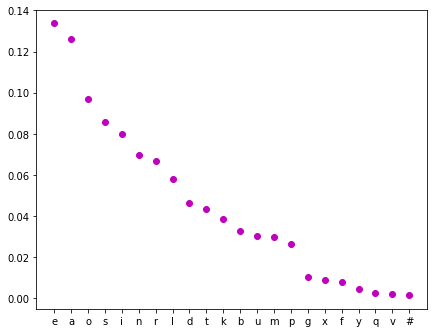

In [19]:
#Procesamiento para Figura Fonetización Simple
f1_a = fonetizacion_simple(new_texto,original)
f1_b = Cambios_Miscelaneos(f1_a)
f1_c =Conteo_fonemas(f1_b)
for i in malos:
    del f1_c[i]
f1, data1 = Grafica(f1_c)

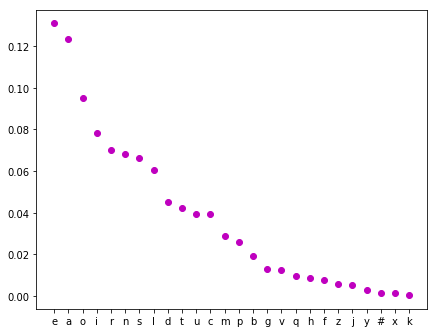

In [20]:
#Procesamiento para Figura 2, No fonetización
f2_a = Cambios_Miscelaneos(new_texto)
f2_b =Conteo_fonemas(f2_a)
for i in malos:
    del f2_b[i]
f2, data2 = Grafica(f2_b)

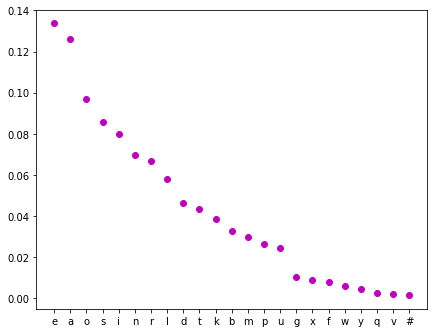

In [21]:
#Fonetizacion con /u/ y /w/ como fonemas diferentes
f3_a = fonetizacion_simple(new_texto,original)
f3_b=Fonetizacion_w(f3_a,phone_w1)
f3_c =Conteo_fonemas(f3_b)
for i in malos:
    del f3_c[i]
f3, data3 = Grafica(f3_c)

In [22]:
#Frecuencias de Figura3
data3

,Frecuencia,Fraccional
e,2912,0.133688
a,2747,0.126113
o,2114,0.097053
s,1864,0.085575
i,1738,0.079791
n,1513,0.069461
r,1451,0.066615
l,1267,0.058167
d,1004,0.046093
t,943,0.043293


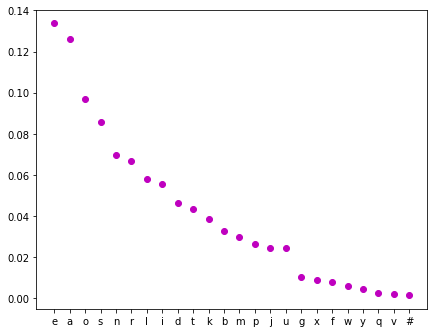

In [23]:
#Fonetizacion con (/u/&/w/) e (/i/&/j/) como fonemas diferentes
f4_a = fonetizacion_simple(new_texto,original)
f4_b=Fonetizacion_i(f4_a,phone_w2,phone_j)
f4_c =Conteo_fonemas(f4_b)
for i in malos:
    del f4_c[i]
f4, data4 = Grafica(f4_c)

In [24]:
#Frecuencias Figura 4
data4

,Frecuencia,Fraccional
e,2912,0.133688
a,2747,0.126113
o,2114,0.097053
s,1864,0.085575
n,1513,0.069461
r,1451,0.066615
l,1267,0.058167
i,1209,0.055505
d,1004,0.046093
t,943,0.043293


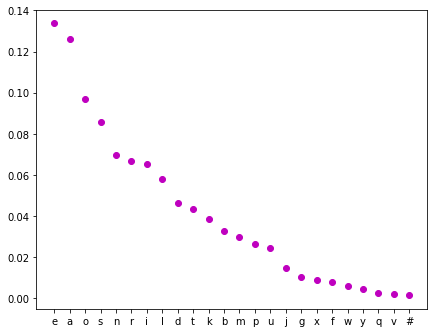

In [25]:
#Fonetizacion con (/u/&/w/) e (/i/&/j/) como fonemas diferentes tomando en cuenta diacríticas
f5_a = fonetizacion_simple(new_texto,original)
f5_b=Fonetizacion_i_diac(f5_a,phone_w3,phone_j)
f5_c =Conteo_fonemas(f5_b)
for i in malos:
    del f5_c[i]
f5, data5 = Grafica(f5_c)

In [26]:
#Frecuencias figura 5
data5

,Frecuencia,Fraccional
e,2912,0.133688
a,2747,0.126113
o,2114,0.097053
s,1864,0.085575
n,1513,0.069461
r,1451,0.066615
i,1418,0.065100
l,1267,0.058167
d,1004,0.046093
t,943,0.043293
